In [1]:
from keras.datasets import cifar10
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
classes = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

def EDA_y(y,name:str):
    '''Function used to visualize the labels distribution'''
    columns_name=name+'_label'
    y = pd.DataFrame (y.tolist(), columns = [columns_name])
    labels=y[columns_name].unique().tolist()
    counts=y[columns_name].value_counts()
    print(f'\nY {name} Labels: {labels}')
    print(f'\nY {name} Counts: \n{counts.sort_index(ascending=True)}')
    print(f'\nY {name} Data Info:')
    print(y.info())

    #All categories are in balance, with each cat distribution at 10%
    print(f'\nVisualization of {name}:')
    fig,ax=plt.subplots(figsize=(6,6))
    sns.countplot(data=y,y=y[columns_name],ax=ax).set(title=f'Figure 1: The Count Of Each Label In Y {name} Data\n')
    #Plot the proportion of each label
    sizes=[counts[v] for v in labels]
    fig1,ax1=plt.subplots()
    ax1.pie(sizes,labels=labels,autopct='%0.0f%%')
    ax1.axis('equal')
    plt.title(f"\nFigure 2: The Proportion of Each Label in Y {name} Data\n")
    plt.tight_layout()
    plt.show()
    
def visualizeImages(image:list,rows:int,cols:int,name:str,y):
    '''Visualize images based on the user defined number of images they want to display'''  
    fig,axes=plt.subplots(rows,cols,figsize=(7,7))
    for i,ax in enumerate(axes.flat):
        ax.imshow(image[i])
        ax.set(xticks=[],yticks=[],xlabel=classes[y[i]])
    fig.suptitle(f'{name} image visualizations')
    plt.show()

#### 1. Inspect Train and Test shape

In [4]:
print(f'Train shape : {X_train.shape,y_train.shape}')
print(f'Test shape  : {X_test.shape,y_test.shape}')

Train shape : ((50000, 32, 32, 3), (50000, 1))
Test shape  : ((10000, 32, 32, 3), (10000, 1))


#### 2. Inspect y_train


Y Train Labels: [6, 9, 4, 1, 2, 7, 8, 3, 5, 0]

Y Train Counts: 
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: Train_label, dtype: int64

Y Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Train_label  50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB
None

Visualization of Train:


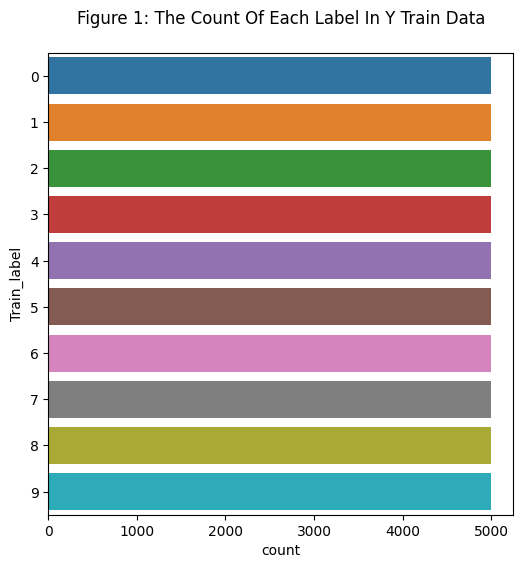

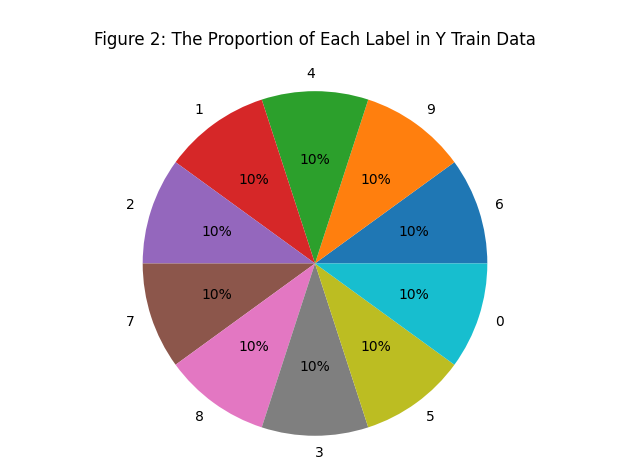

In [5]:
EDA_y(y_train,'Train')

#### 3. Inspect y_test


Y Test Labels: [3, 8, 0, 6, 1, 9, 5, 7, 4, 2]

Y Test Counts: 
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: Test_label, dtype: int64

Y Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Test_label  10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB
None

Visualization of Test:


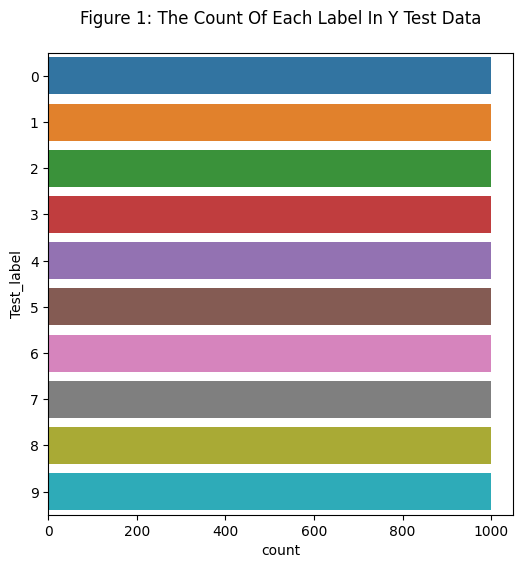

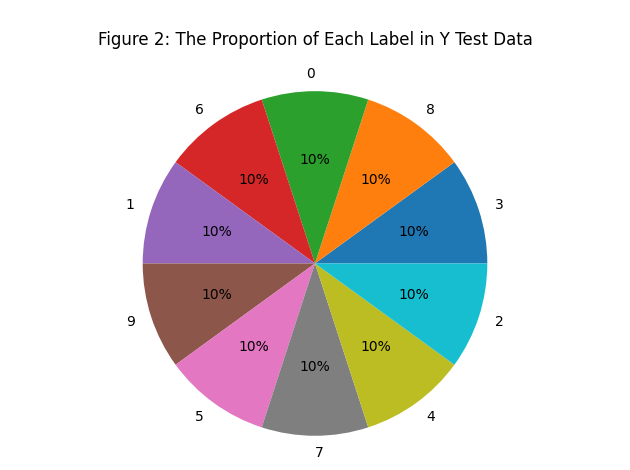

In [6]:
EDA_y(y_test,'Test')

#### 4. Visualize Training Images

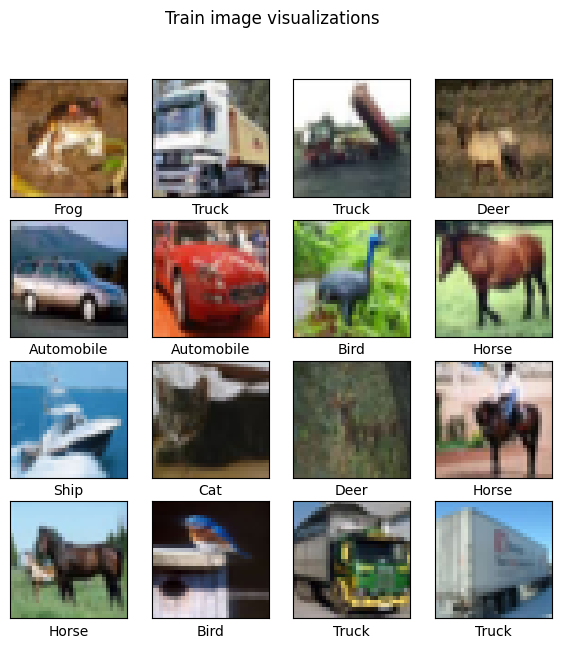

In [7]:
visualizeImages(X_train,4,4,'Train',y_train.reshape(-1))

#### 5. Visualiza Testing Images

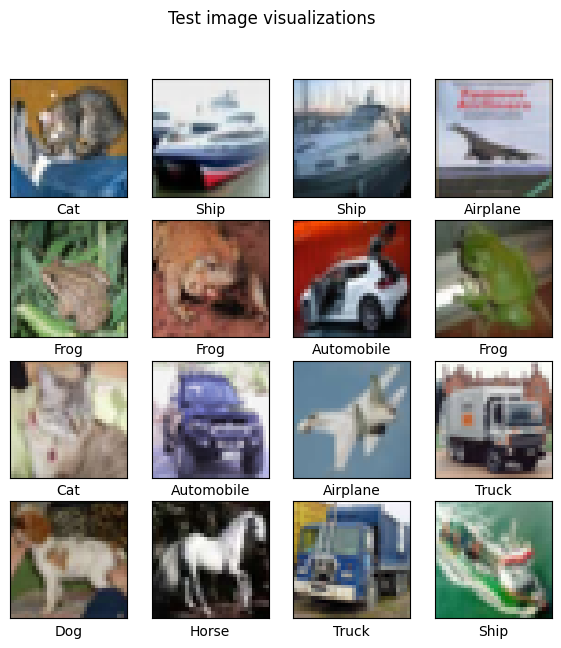

In [8]:
visualizeImages(X_test,4,4,'Test',y_test.reshape(-1))